In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import matplotlib.animation as animation
from scipy.sparse import diags

In [2]:
%matplotlib inline

#### Helper Functions

In [3]:
def heat_1(u_t0, u_x0, u_t1, x_max, x_min, t_max, t_min, x_int, t_int, nu):
    #create the time and x_vals matrix
    h = (x_max-x_min)/x_int
    k = (t_max-t_min)/t_int
    lambd = nu*k/(h**2)
    t_vals = np.linspace(t_min, t_max, t_int+1, endpoint=True)
    x_vals = np.linspace(x_min, x_max, x_int+1, endpoint=True)
    #create the vector of the matrix updates
    diag_vec = np.array([lambd, 1-2*lambd, lambd])
    #now initialize the matrix to store the values
    U_vals = np.zeros([x_int+1, t_int+1])
    #initial values
    U_vals[0,:] = u_t0(t_vals)
    U_vals[-1,:] = u_t1(t_vals)
    U_vals[1:-1, 0] = u_x0(x_vals[1:-1])
    #now update the matrix
    for i in range(1,len(t_vals)):
        #vectorization of the A matrix
        a = np.array([U_vals[j:j+len(diag_vec),i-1] for j in range(x_int-1)]).T
        U_vals[1:-1, i] = np.matmul(diag_vec.T, a)
    return U_vals, x_vals, t_vals

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = .05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{.2 - |x-.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ at time $t = .4$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.

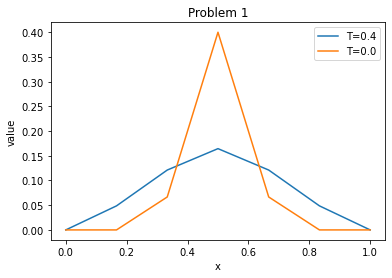

In [4]:
#define the functions to be used in problem 1
def u_t0(x):
    return np.zeros_like(x)
def u_t1(x):
    return np.zeros_like(x)
def u_x0(x):
    return 2*np.maximum(.2-np.absolute(x-0.5),np.zeros_like(x))
#now define the other values
x_int = 6
t_int = 10
t_min = 0
t_max = 1
x_min = 0
x_max = 1
nu = 0.05
#now call the function
U, x_vals, t_vals = heat_1(u_t0, u_x0, u_t1, x_max, x_min, t_max, t_min, x_int, t_int, nu)
#now plot the relevant results
plt.clf()
plt.plot(x_vals, U[:,4], label='T=0.4')
plt.plot(x_vals, U[:,0], label='T=0.0')
plt.title("Problem 1")
plt.xlabel("x")
plt.ylabel('value')
plt.legend()
plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.

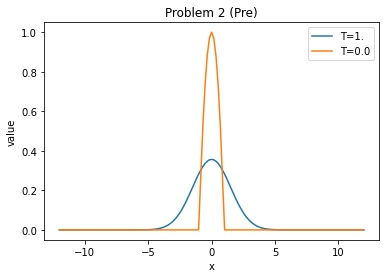

In [5]:
#define the functions to be used in problem 2
def u_t0(x):
    return np.zeros_like(x)
def u_t1(x):
    return np.zeros_like(x)
def u_x0(x):
    return np.maximum(1-np.square(x),np.zeros_like(x))
#define the initial conditions
#now define the other values
x_int = 140
t_int = 70
t_min = 0
t_max = 1
x_min = -12
x_max = 12
nu = 1
#now call the function
U, x_vals, t_vals = heat_1(u_t0, u_x0, u_t1, x_max, x_min, t_max, t_min, x_int, t_int, nu)
#now plot the relevant results
plt.clf()
plt.plot(x_vals, U[:,-1], label='T=1.')
plt.plot(x_vals, U[:,0], label='T=0.0')
plt.title("Problem 2 (Pre)")
plt.xlabel("x")
plt.ylabel('value')
plt.legend()
plt.show()

### Part (i)

In [6]:
#create the plot
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_title("Problem 2(i) Animation")
ax.set_xlim([-12.1, 12.1])
ax.set_ylim([-0.1,1.1])
ax.set_xlabel("x")
ax.set_ylabel("u(t,x)")
plt.ioff()
traj, = plt.plot([],[], axes=ax, color='b', label='model', alpha=0.5)
#animate
def update(i):
    traj.set_data(x_vals, U[:,i])
    return traj
#now create the animation
ani = animation.FuncAnimation(fig, update, frames=range(len(t_vals)-1), interval=25)
ani.save('heat_equation1.mp4')
plt.clf()

<Figure size 432x288 with 0 Axes>

<video src="heat_equation1.mp4" controls>

### Part (ii)

In [7]:
#define the functions to be used in problem 2
def u_t0(x):
    return np.zeros_like(x)
def u_t1(x):
    return np.zeros_like(x)
def u_x0(x):
    return np.maximum(1-np.square(x),np.zeros_like(x))
#define the initial conditions
#now define the other values
x_int = 140
t_int = 66
t_min = 0
t_max = 1
x_min = -12
x_max = 12
nu = 1
#now call the function
U, x_vals, t_vals = heat_1(u_t0, u_x0, u_t1, x_max, x_min, t_max, t_min, x_int, t_int, nu)
#animate
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_title("Problem 2(ii) Animation")
ax.set_xlim([-12.1, 12.1])
ax.set_ylim([-0.1,1.1])
ax.set_xlabel("x")
ax.set_ylabel("u(t,x)")
plt.ioff()
traj, = plt.plot([],[], axes=ax, color='b', label='model', alpha=0.5)
#animate
def update(i):
    traj.set_data(x_vals, U[:,i])
    return traj
#now create the animation
ani = animation.FuncAnimation(fig, update, frames=range(len(t_vals)-1), interval=25)
ani.save('heat_equation2.mp4')
plt.clf()

<Figure size 432x288 with 0 Axes>

<video src="heat_equation2.mp4" controls>

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}

Demonstrate that the numerical approximation at $t = 1$ converges to  $u(x,t=1)$.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in Figure 4.
The slope of the line there shows the proper rate of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition and we can use the same number of intervals in time and space.

In [8]:
def heat_cn(nu,f,xbounds,tbounds,xsteps,tsteps):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
    """
    #create the time and x_vals matrix
    h = (xbounds[1]-xbounds[0])/xsteps
    k = (tbounds[1]-tbounds[0])/tsteps
    lambd = nu*k/(h**2)
    t_vals = np.linspace(t_min, t_max, tsteps+1, endpoint=True)
    x_vals = np.linspace(x_min, x_max, xsteps+1, endpoint=True)
    #create the vector of the matrix updates
    diag_vec = np.array([lambd, 1-2*lambd, lambd])
    #now initialize the matrix to store the values
    U_vals = np.zeros([xsteps+1, tsteps+1])
    #initial values
    U_vals[0,:] = np.zeros_like(t_vals)
    U_vals[-1,:] = np.zeros_like(t_vals)
    U_vals[1:-1, 0] = f(x_vals[1:-1])
    #define the B and A
    A = diags([lambd, 1-2*lambd, lambd],[-1,0,1], shape=(xsteps+1, xsteps+1))
    A = A.toarray()
    B = diags([-lambd, 1+2*lambd, -lambd],[-1,0,1], shape=(xsteps+1, xsteps+1))
    B = B.toarray()
    A[0,:] = 0
    A[-1,:] = 0
    A[0,0] = 1
    A[-1,-1] = 1
    B[0,:] = 0
    B[-1,:]= 0
    B[0,0] = 1
    B[-1,-1] = 1
    B_inv = la.inv(B)
    #now compute the update steps
    for i in range(1,len(t_vals)):
        U_vals[:,i] = B_inv @ A @ U_vals[:,i-1]
    return U_vals, x_vals, t_vals, h

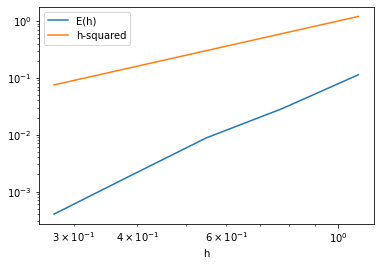

In [9]:
#define the relevant values
step_vals = [40,80,160,320]
true_val = 640
orig_val = 20
xbounds = [-12,12]
tbounds = [0,1]
def f(x):
    return np.maximum(1-np.square(x), np.zeros_like(x))
nu = 1
h_list = list()
error_list = list()
#calculate the "actual solution"
U_act, _, t_vals_act, h = heat_cn(nu, f, xbounds, tbounds, true_val, true_val)
#get the t_vals of the largest step size
U_orig, _, t_vals_orig, h = heat_cn(nu, f, xbounds, tbounds, orig_val, orig_val)
num_Elems = len(t_vals_orig)
idx = np.round(np.linspace(0, len(t_vals_act) - 1, num_Elems)).astype(int)
true = U_act[idx, -1]
pred = U_orig[:, -1]
pre_error = np.max(la.norm(true-pred, 1))
h_list.append(h)
error_list.append(pre_error)
#now calculate the remaining steps
for i in step_vals:
    #calculate the results
    U, _, t_vals, h = heat_cn(nu, f, xbounds, tbounds, i, i)
    #now select only the results with the 
    idx = np.round(np.linspace(0, len(t_vals) - 1, num_Elems)).astype(int)
    pred = U[idx, -1]
    h_list.append(h)
    error = np.max(la.norm(true-pred, 1))
    error_list.append(error)   
#plot the results
plt.clf()
plt.loglog(np.sqrt(h_list),error_list,label="E(h)")
plt.loglog(np.sqrt(h_list),h_list,label="h-squared")
plt.xscale('log')
plt.legend()
plt.xlabel('h')
plt.show()